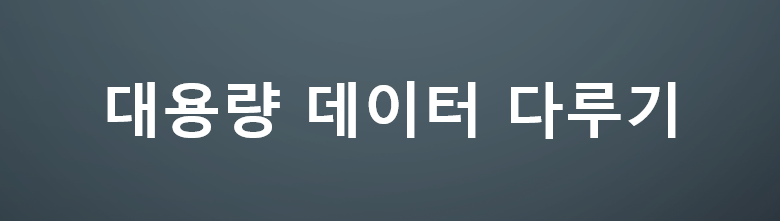  

<font size=30px> 목차</font>
<span style='display:inline-block;font-size: 20px;'>
    
1. <font color=blue><b>인터넷에서 데이터 수집 방법</b></font>
   > Scraping : 웹사이트에서 특정 데이터 수집  
   > Crawling : 크롤러를 통해 웹사이트에서 데이터 수집
2. Naver 서비스 API 활용
   > ⓐ Naver 계정으로 로그인  
   > ⓑ [네이버 개발자 센터에 접속 https://developers.naver.com](https://developers.naver.com )  
   > ⓒ 오픈API 이용신청  
   > ⓓ 애플리케이션 등록  
   > <font color=red>(옵션) 공공데이터 오픈API 활용</font>  
3. 데이터 시각화(**`matplotlib.pyplot`**)

</span>

<font size=30px>1. 인터넷에서 데이터 수집 방법</font>  
## 정적 웹 페이지 Crawling
> 설치  
> pip install beautifulsoup4  
> 모듈 추가  
> from bs4 import BeautifulSoup

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install beautifulsoup4

In [ ]:
# 사이트 보기
from IPython.display import HTML
HTML("""
<h1 id="title">전남대학교</h1>
<div class="top">
  <ul class="menu"><li><a href="https://sso.jnu.ac.kr/Idp/Login.aspx" class="login">로그인</a></li></ul>
  <ul class="portal"><li><a href="https://portal.jnu.ac.kr">전남대 포털</a></li></ul>
</div>
""")


In [ ]:
#전남대 홈페이지 - 내용보기
from bs4 import BeautifulSoup as bs
import urllib.request
url = 'https://www.jnu.ac.kr'        # URL 
html = urllib.request.urlopen(url)   # URL 웹페이지 가져오기
#html = '<h1 id="title">전남대학교</h1><div class="top"><ul class="menu"><li><a href="https://sso.jnu.ac.kr/Idp/Login.aspx" class="login">로그인</a></li></ul><ul class="portal"><li><a href="https://portal.jnu.ac.kr">전남대 포털</a></li></ul></div>'
soup = bs(html, 'html.parser')
print(soup.prettify())

In [ ]:
#간단한 사용 - 내용보기
from bs4 import BeautifulSoup as bs
import urllib.request
#url = 'https://www.jnu.ac.kr'        # URL 
#html = urllib.request.urlopen(url)   # URL 웹페이지 가져오기
html = '<h1 id="title">전남대학교</h1><div class="top"><ul class="menu"><li><a href="https://sso.jnu.ac.kr/Idp/Login.aspx" class="login">로그인</a></li></ul><ul class="portal"><li><a href="https://portal.jnu.ac.kr">전남대 포털</a></li></ul></div>'
soup = bs(html, 'html.parser')
print(soup.prettify())

## 웹페이지내 첫번째 요소 가져오기

In [ ]:
soup.h1

In [ ]:
soup.div

In [ ]:
soup.a

## 웹페이지내 지정한 모든 태그를 리스트 타입으로 받기 

In [ ]:
# 리스트 타입으로 <ul> 가져오기
soup.find_all("ul")

In [ ]:
# 리스트 타입으로 <a> 가져오기
soup.find_all("a")

## &lt;a&gt; 태그 속성 가져오기

In [ ]:
tag_a = soup.a
tag_a

In [ ]:
tag_a.attrs

## 원하는 태그 추적하기 
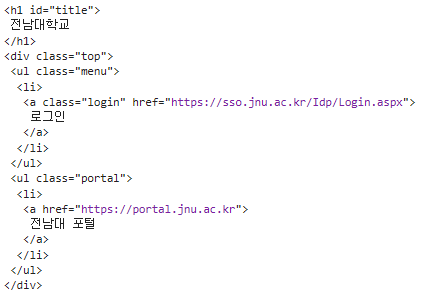

In [ ]:
li_list = soup.select("div>ul.portal>li")
li_list

In [ ]:
title = soup.find(id="title")
title

## 정적 웹 페이지 정책
* 홈디렉토리: robots.txt
* 만일, robots.txt 파일이 없다면 제어 정책이 없다는 것으로 크롤링 가능
  > 모든 접근 허용: User-agent:*  Allow: /  또는 User-agent:* Disallow:  
  > 모든 접근 제한: User-agent:* Disallow: /  
  > 특정 디렉토리만 접근 금지: User-agent:* Disallow: /user/  

## **`HOLLYS`** 사이트의 매장 분석
* [할리스 커피 https://www.hollys.co.kr](https://www.hollys.co.kr)
* 매장 검색
  
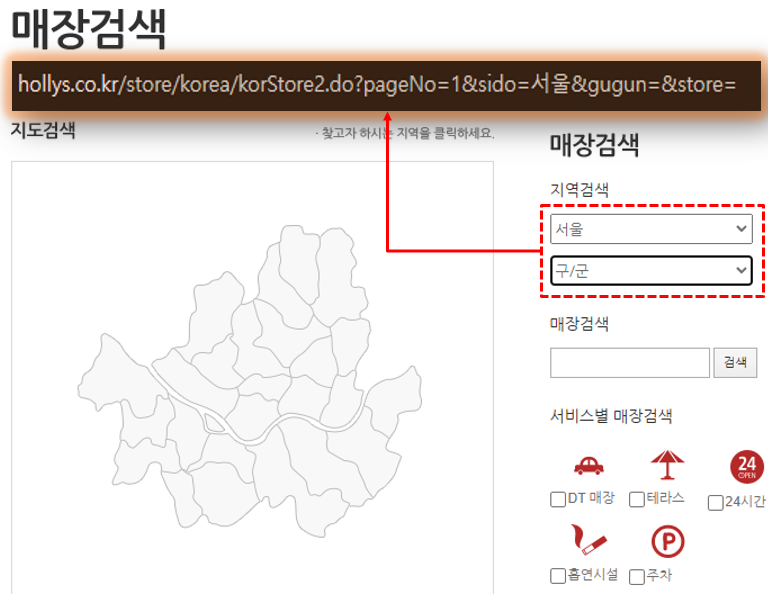


In [ ]:
# 간단한 예시
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

def hollys_store(result):
    for page in range(1,50):  # 매장 1 ~ 49페이지
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' % page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soup = BeautifulSoup(html,'html.parser')
        tag_tbody = soup.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:  # 리스트가 3개 이하인 경우 종료
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string    # 매장명
            store_sido = store_td[0].string    # 지역 
            store_address = store_td[3].string # 주소
            store_phone = store_td[5].string   # 전화번호
            result.append([store_name]+[store_sido]+[store_address]+[store_phone])
    return

def main():
    result = [] 
    print('Hollys store crawling')
    hollys_store(result)
    hollys_tbl = pd.DataFrame(result,columns = ['store','sido-gu','address','phone'])
    hollys_tbl.to_csv('hollys1.csv',encoding='utf8',mode='w',index=True)
    del result[:]
if __name__ == '__main__':
    main()
            

## 동적 웹 페이지 크롤링
* 설치 및 사용법 
   > (필수)<font color=blue>pip install selenium</font>  
   > (필수)<font color=blue>pip install webdriver_manager</font> **`ChromeDriver 자동관리(webdriver_manager)`**   
   > WebDriver 다운로드 : https://www.selenium.dev/downloads  
   > 사용법 소개: https://www.selenium.dev/documentation/  


## selenium 예시(1) 실행 결과
* search_results.png

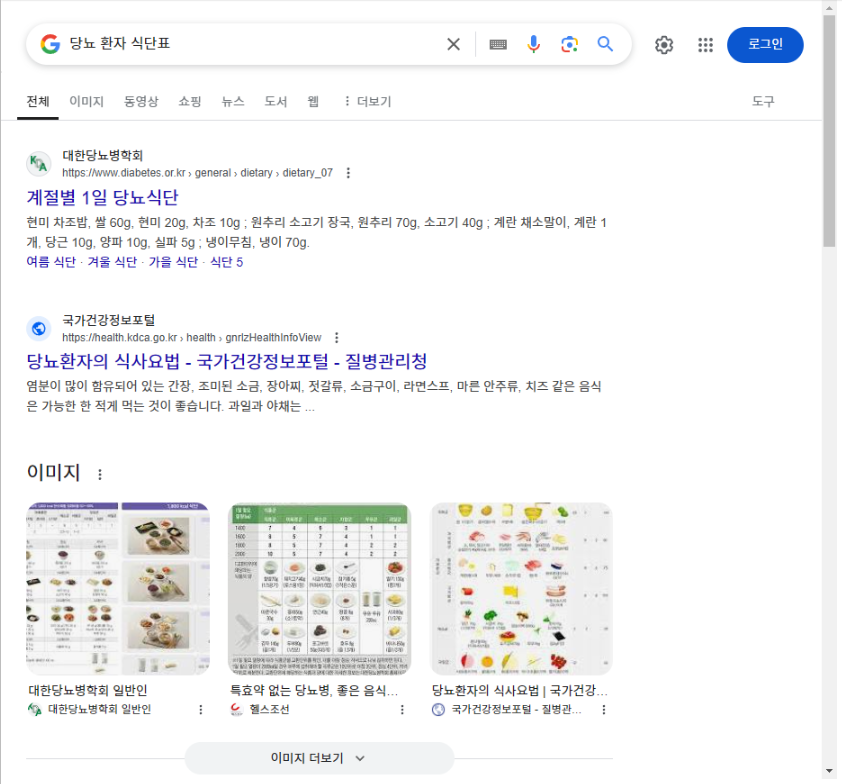  

In [ ]:
# selenium 예시(1) 
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

#크롬 드라이버 자동 생성
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

#구글 웹사이트 접속
driver.get("http://www.google.com")

# 검색 입력창 찾기(검색창의 이름 'q')
search_box = driver.find_element(By.NAME, 'q')

# 검색어 입력
search_box.send_keys('당뇨 환자 식단표')

# 검색 실행
search_box.submit()
time.sleep(5)

# 결과 페이지 스크린샷 저장
driver.save_screenshot('search_results.png')

#브라우저 종료
driver.quit()

## 셀레니움 명령어
* 크롬 드라이버 생성
 > from selenium import webdriver  
 > from selenium.webdriver.chrome.service import Service as ChromeService  
 > from webdriver_manager.chrome import ChromeDriverManager  
 > driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))   
* 사이트 접속
 > url = 'https://www.naver.com'  
 > driver.get(url)  

* XML기반의 XPath를 활용한 객체 찾은 후 값 가져오기  
 > driver.find_element('xpath','[실제 XPath 값]').text  
 > 
* 특정 위치 클릭
 > driver.find_element('xpath','[실제 XPath 값]').click()

* 특정 위치에 텍스트 입력
 > driver.find_element('xpath','[실제 XPath 값]').send_keys('[텍스트]')

* 그 외에 셀레니움 함수
 > 뒤로 : driver.back()  
 > 앞으로 : driver.forward()  
 > 새로고침: driver.refresh()  
 > 탭닫기: driver.close()  
 > 창닫기: driver.quit()  
 > 창최대화: driver.maximize_window()  
 > 창최소화: driver.minimize_window()  
 > 브라우저HTML정보출력: driver.page_source()  
  

## **`CoffeeBean`** 매장 자동 검색
* [커피빈 홈 https://www.coffeebeankorea.com/main/main.asp](https://www.coffeebeankorea.com/main/main.asp)  
* [매장찾기 https://www.coffeebeankorea.com/store/store.asp](https://www.coffeebeankorea.com/store/store.asp)

1. 매장번호를 마우스 클릭
   
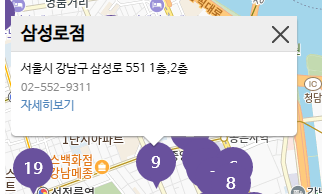  
2. 파업메뉴의 **`자세히보기`** 마우스 클릭  

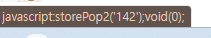  

3. 매장 정보 확인 및 마우스 오른쪽버튼 &lt; 파업메뉴 중 **`검사`** 클릭하여 소스 확인

In [ ]:
# selenium 예시(2) 
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

def CoffeeBean_store(result):
    url = "https://www.coffeebeankorea.com/store/store.asp"
    #크롬 드라이버 생성
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    for i in range(1,10): # 기본 10개 매장만, 매장 수만큼 반복 300
        #커피빈 웹사이트 접속
        driver.get(url)
        time.sleep(1)
        try:
            # 커피빈 매장 정보 - 자바스크립트 함수 호출
            driver.execute_script("storePop2(%d)" % i)
            time.sleep(1)
            
            # 자바스크립트 함수가 수행된 페이지 저장
            html = driver.page_source
            
            # BeautifulSoup 객체 생성
            soup = BeautifulSoup(html,'html.parser')
            #print(soup.prettify())
            store_name_h2 = soup.select("div.store_txt > h2")
            store_name = store_name_h2[0].string
            print(store_name) #매장 이름 출력
            store_info = soup.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]
            store_phone = store_info[3].string
            result.append([store_name]+[store_address]+[store_phone])
        except:
            continue
    # 결과 페이지 스크린샷 저장
    driver.save_screenshot('CoffeeBean_results.png')
    #브라우저 종료
    driver.quit()
    return

def main():
    result = []
    print('CoffeeBean store crawling')
    CoffeeBean_store(result)
    CB_tb1 = pd.DataFrame(result, columns = ['store','address','phone'])
    CB_tb1.to_csv('CoffeeBean_info.csv', encoding='utf8', mode= 'w', index=True)

if __name__ == '__main__':
    main()            
